In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


### To test the model I wanted to create a notebook where I can dynamically load images from a URL or File Path to see how my model performs and do some analysis

In [2]:
# Load model
model = load_model('models/first_model/model.h5')

## HELPER FUNCTION

In [3]:
def make_prediction_from_path(image_path, model, from_url=False):
    '''
    A function to make a prediction for a image, given its url or filepath
    
    Parameters
        ----------
        image_path : str
            The path to the image (filepath or url)
        from_url : boolean
            The a flag to set, True if path is a url, False if loaded from file system
        model : keras model
            the model to use for predictions
    '''
    try:
        model = model
        if from_url == True:
            # Download image
            response = requests.get(image_path, stream=True)
            img = Image.open(response.raw).convert("RGBA")
        else:
            img = Image.open(image_path).convert("RGBA")

        # Format
        new_image = Image.new('RGB', img.size, color=(255,255,255))
        new_image.paste(img, (0,0), img)
        done_formatting = new_image.resize((300,300))
        plt.imshow(done_formatting)

        ## IMPORTANT!!!! I have trained the model using the ImageDataGenerator which rescaled the image
        ## before feeding it to the model.
        ## We must now also rescale the picture before making a prediction
        img_reformatted = (1/255) * np.array(done_formatting).reshape((1, 300, 300, 3))
        print("Probability that shoe is in the picture:")
        print(model.predict(img_reformatted)[0][0])
        return img_reformatted
    except Exception as e:
        print("Something went wrong! Error Message:")
        print(e)

# Enter file path here:

Probability that shoe is in the picture:
0.5437097


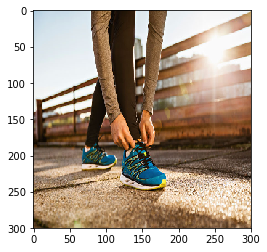

In [20]:
# Enter URL or filepath here:
image_path = "test_images/test_1.jpg"
# Set flag "from_url" to False if you choose an image you want to load from file path
from_url = False
img_reformatted = make_prediction_from_path(image_path, model, from_url=from_url)

### Current insights:
The model categorizes the best when shoes are in the center of the picture so the position of a shoe is very important.

Also the model I trained seems to look only for a certain shapes and is not very sensitive to detail since I was able to trick it by drawing a shoe and it was very confident making its prediction.

The model also needs the shoes to be in the "correct" horizontal position.

I left some pictures in the test_images/ directory to test and demonstrate how i came to the conclusions mentioned above.

### Here I wanted to explore the different activation maps of some layers

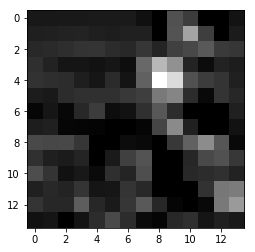

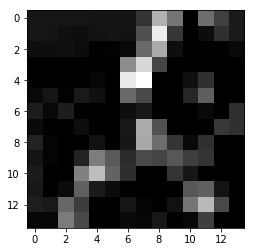

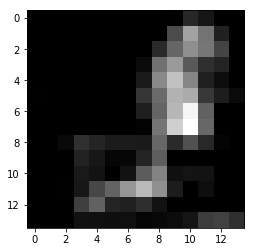

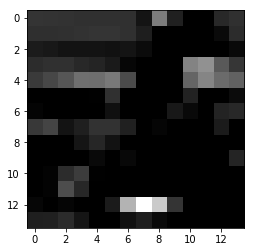

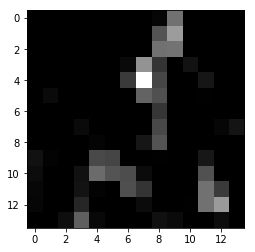

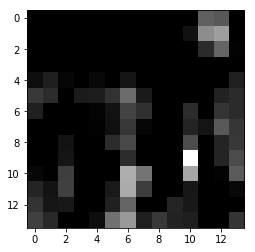

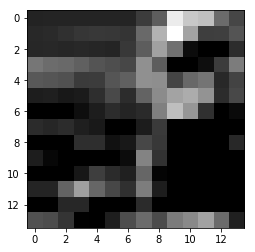

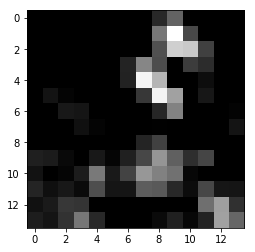

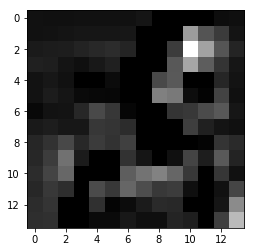

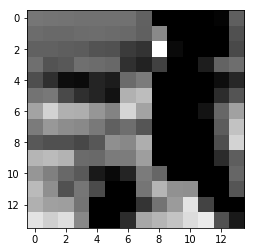

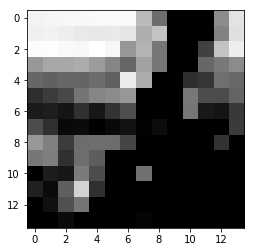

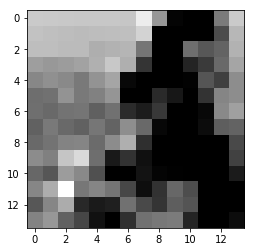

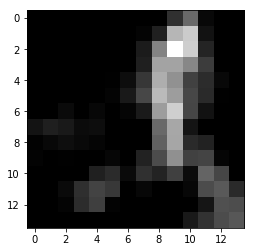

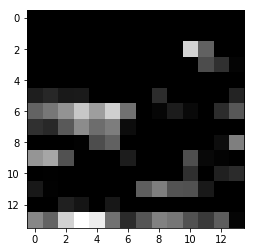

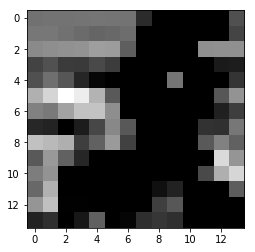

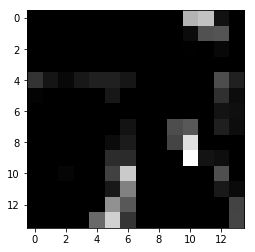

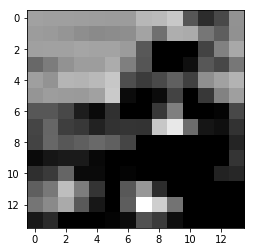

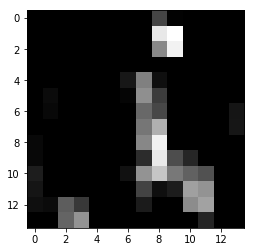

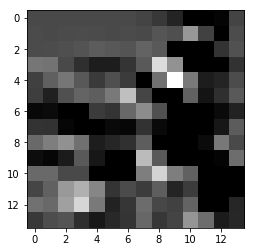

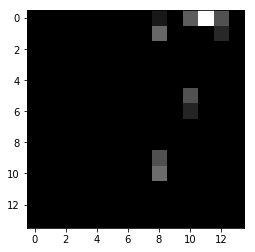

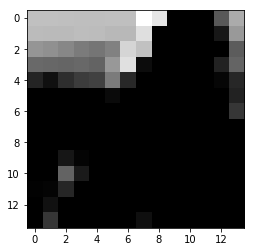

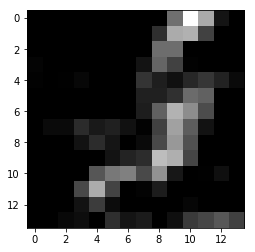

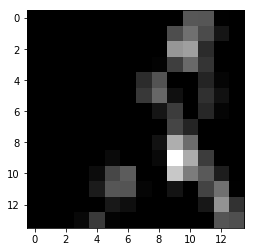

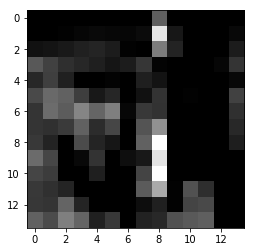

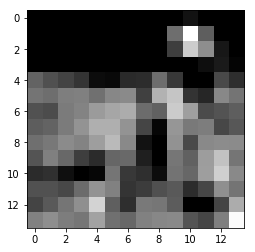

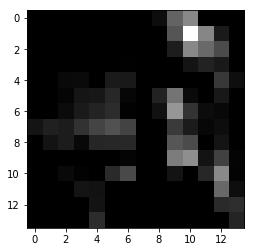

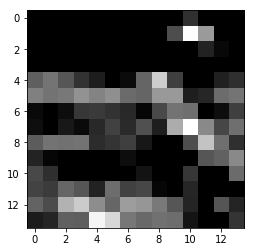

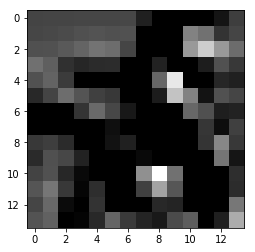

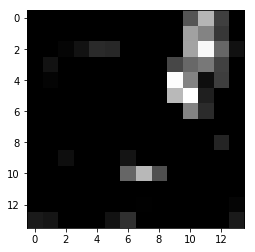

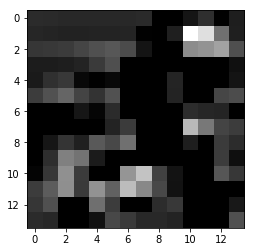

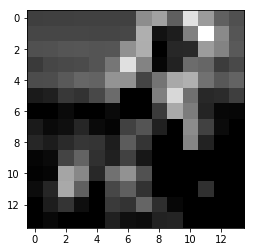

In [10]:
import scipy as sp

# import Keras's functional api
from keras.models import Model

# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]

# create a new model to output the feature maps and the predicted labels
m2 = Model(inputs=model.input, outputs=(model.layers[-7].output, model.layers[-1].output))
feature_maps, output_prob = m2.predict(img_reformatted)

ix = 1
for _ in range(31):
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure
    plt.show()

Resources:
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
https://towardsdatascience.com/multi-label-classification-and-class-activation-map-on-fashion-mnist-1454f09f5925